In [ ]:
# Project-2 : Customer Churn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# na_values='' replaces blank values with NA
customerData = pd.read_csv("customer_churn.csv") 

In [ ]:
customerData.head()

In [ ]:
# Replacing Churn Yes/No with 1/0

customerData["Churn"] = customerData["Churn"].replace(to_replace = ['Yes','No'], value = [1,0])
customerData["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
customerData.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
# A) Data Manipulation:

In [ ]:
# a. Find the total number of male customers
numMales = customerData[customerData['gender']=='Male']
numMales.shape

# sum(customerData['gender']=='Male')


(3555, 21)

In [ ]:
# b. Find the total number of customers whose Internet Service is ‘DSL’
sum(customerData['InternetService']=='DSL')

2421

In [ ]:
# c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the
# result in ‘new_customer’

new_customer = customerData[(customerData["gender"] == "Female") & 
                            (customerData["SeniorCitizen"] == 1) & 
                            (customerData["PaymentMethod"] == "Mailed check")]
new_customer


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No
694,2682-KEVRP,Female,1,No,No,22,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.05,417,No
747,3966-HRMZA,Female,1,No,No,3,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,75.05,202.9,No
947,9904-EHEVJ,Female,1,Yes,Yes,32,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,91.35,2896.55,No
1029,4184-TJFAN,Female,1,Yes,Yes,3,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,88.30,273.75,Yes
1112,2176-LVPNX,Female,1,No,No,71,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.85,6293.45,No


In [ ]:
# Replacing empty string '' values with NaN

customerData["TotalCharges"] = customerData["TotalCharges"].replace(r'^\s*$', np.NaN, regex=True)
customerData[488:489]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No


In [ ]:
# Converting string values to float by using astype(float)

customerData["TotalCharges"] = customerData["TotalCharges"].astype(float)
customerData["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
# d. Extract all those customers whose tenure is less than 10 months or their Total charges is less
# than 500$ & store the result in ‘new_customer’

new_customer = customerData[(customerData["tenure"]<10) | (customerData["TotalCharges"] <500)]
new_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
# B) Data Visualization:

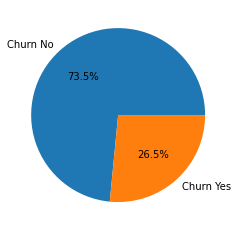

In [ ]:
# a. Build a pie-chart to show the distribution of customers would be churning out

# custChurnY = sum(customerData['Churn'] == "Yes")
# custChurnN = sum(customerData['Churn'] == "No")
# print(custChurnY, custChurnN)
# counts = [custChurnY,custChurnN]


chList = customerData['Churn'].value_counts()
labels = ["Churn No","Churn Yes"]


plt.pie(chList, labels = labels, autopct='%1.1f%%')
plt.show()


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


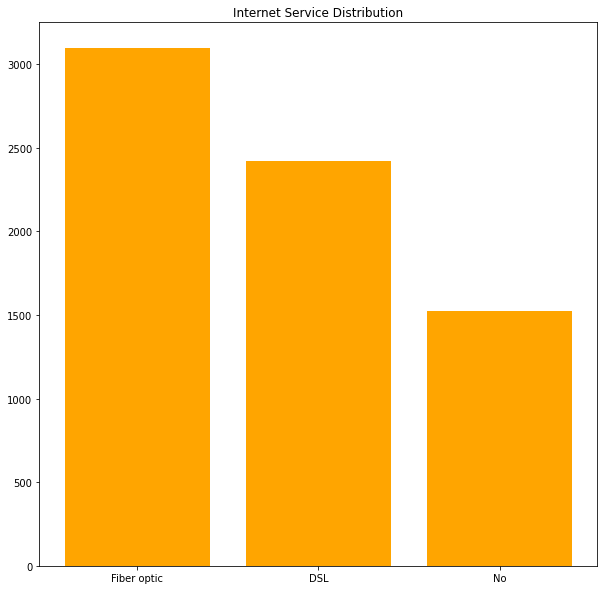

In [ ]:
# b. Build a bar-plot to show the distribution of ‘Internet Service’

intservList = customerData['InternetService'].value_counts()
print(intservList)
names = intservList.keys()

fig = plt.figure(figsize=(10,10))

ax = plt.subplot()
ax.bar(names, intservList, color='orange')
plt.title("Internet Service Distribution")
plt.show()

In [ ]:
# C) Model Building:

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import relu,softmax,sigmoid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy,binary_crossentropy

In [ ]:
# a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using
# ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:

x = customerData['tenure']
y = customerData["Churn"]


x.shape, y.shape, type(x), type(y)

((7043,), (7043,), pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state= 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4930,)
(4930,)
(2113,)
(2113,)


In [ ]:
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

x_train.shape,y_train.shape, x_test.shape, y_test.shape, type(x_train), type(y_train), type(x_test), type(y_test)

((4930, 1),
 (4930, 1),
 (2113, 1),
 (2113, 1),
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray)

In [ ]:
# i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
# ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

model = Sequential()
model.add(Dense(12, activation=relu, input_dim=1))
model.add(Dense(8, activation=relu))
model.add(Dense(1,activation=sigmoid))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# iii. Use ‘Adam’ as the optimization algorithm

model.compile(optimizer='Adam', loss = binary_crossentropy, metrics = ["acc"])

In [ ]:
# iv. Fit the model on the train set, with number of epochs to be 150

history = model.fit(x_train,y_train, epochs= 150, validation_data=(x_test, y_test))


Epoch 1/150
155/155 [==============================] - 0s 2ms/step - loss: 2.6671 - acc: 0.2546 - val_loss: 0.9055 - val_acc: 0.2840
Epoch 2/150
155/155 [==============================] - 0s 1ms/step - loss: 0.6797 - acc: 0.6584 - val_loss: 0.6474 - val_acc: 0.7383
Epoch 3/150
155/155 [==============================] - 0s 2ms/step - loss: 0.6416 - acc: 0.7331 - val_loss: 0.6344 - val_acc: 0.7383
Epoch 4/150
155/155 [==============================] - 0s 2ms/step - loss: 0.6282 - acc: 0.7331 - val_loss: 0.6203 - val_acc: 0.7383
Epoch 5/150
155/155 [==============================] - 0s 2ms/step - loss: 0.6149 - acc: 0.7331 - val_loss: 0.6074 - val_acc: 0.7383
Epoch 6/150
155/155 [==============================] - 0s 2ms/step - loss: 0.6025 - acc: 0.7331 - val_loss: 0.5958 - val_acc: 0.7383
Epoch 7/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5908 - acc: 0.7331 - val_loss: 0.5850 - val_acc: 0.7383
Epoch 8/150
155/155 [==============================] - 0s 2ms/step - 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# v. Predict the values on the test set and build a confusion matrix
# y_predict = model.predict(x_test)

y_predict = model.predict_classes(x_test)

y_predict

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
cm = confusion_matrix(y_test, y_predict)
print ("Confusion Matrix :\n",cm)

aScore = accuracy_score(y_test, y_predict)
print ("Accuracy Score :\n",aScore)

Confusion Matrix :
 [[1443  117]
 [ 409  144]]
Accuracy Score :
 0.7510648367250355


In [ ]:
(1443+144)/(1443+144+117+409)

0.7510648367250355

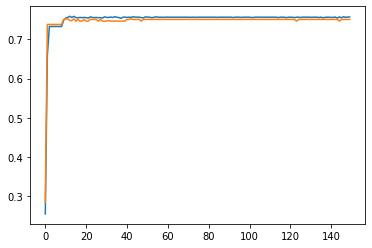

In [ ]:
# vi. Plot the ‘Accuracy vs Epochs’ graph

accr1 = history.history['acc']
epochs1 = history.history["val_acc"]

plt.plot(accr1)
plt.plot(epochs1)
plt.show()


In [ ]:
# b. Build the 2nd model using same target and feature variables:
# i. Add a drop-out layer after the input layer with drop-out value of 0.3
# ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2
# iii. Predict the values on the test set and build a confusion matrix
# iv. Plot the ‘Accuracy vs Epochs’ graph

In [ ]:
model = Sequential()
model.add(Dense(12, activation=relu, input_dim=1))
model.add(Dropout(0.3))
model.add(Dense(8, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(1,activation=sigmoid))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                24        
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=categorical_crossentropy, optimizer='Adam', metrics = ['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs= 100, validation_data=(x_test, y_test))

Epoch 1/100
155/155 [==============================] - 0s 2ms/step - loss: 3.1821e-08 - acc: 0.6604 - val_loss: 3.1199e-08 - val_acc: 0.7383
Epoch 2/100
155/155 [==============================] - 0s 1ms/step - loss: 3.1821e-08 - acc: 0.6560 - val_loss: 3.1199e-08 - val_acc: 0.7383
Epoch 3/100
155/155 [==============================] - 0s 2ms/step - loss: 3.1821e-08 - acc: 0.6586 - val_loss: 3.1199e-08 - val_acc: 0.7383
Epoch 4/100
155/155 [==============================] - 0s 2ms/step - loss: 3.1821e-08 - acc: 0.6550 - val_loss: 3.1199e-08 - val_acc: 0.7383
Epoch 5/100
155/155 [==============================] - 0s 2ms/step - loss: 3.1821e-08 - acc: 0.6657 - val_loss: 3.1199e-08 - val_acc: 0.7383
Epoch 6/100
155/155 [==============================] - 0s 1ms/step - loss: 3.1821e-08 - acc: 0.6645 - val_loss: 3.1199e-08 - val_acc: 0.7383
Epoch 7/100
155/155 [==============================] - 0s 2ms/step - loss: 3.1821e-08 - acc: 0.6592 - val_loss: 3.1199e-08 - val_acc: 0.7383
Epoch 8/100
1

In [ ]:
y_predict2 = model.predict_classes(x_test)

cm2 = confusion_matrix(y_test, y_predict2)
accS2 = accuracy_score(y_test, y_predict2)

print("Confustion Matrix :\n", cm2)
print("Accuracy Score :\n", accS2)

Confustion Matrix :
 [[1560    0]
 [ 553    0]]
Accuracy Score :
 0.7382867960246096


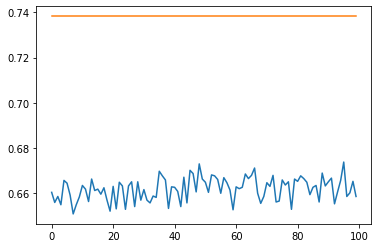

In [ ]:
acc1 = history.history['acc']
epoch1 = history.history['val_acc']

plt.plot(acc1)
plt.plot(epoch1)
plt.show()

In [ ]:
# c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and
# ‘Churn’ as the dependent/target column:
# i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
# ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
# iii. Use ‘Adam’ as the optimization algorithm
# iv. Fit the model on the train set, with number of epochs to be 150
# v. Predict the values on the test set and build a confusion matrix
# vi. Plot the ‘Accuracy vs Epochs’ graph

In [ ]:
type(customerData), type(customerData['TotalCharges'])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
customerData["tenure"] = customerData["tenure"].astype(str)
customerData["MonthlyCharges"] = customerData["MonthlyCharges"].astype(str)

In [ ]:
x = customerData[['tenure','MonthlyCharges','TotalCharges']]
y = customerData['Churn']

x.shape, y.shape, y[10], type(y)

((7043, 3), (7043,), 0, pandas.core.series.Series)

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

x_train.shape,x_test.shape,y_train.shape, y_test.shape, type(x_train),type(y_train),

((5634, 3),
 (1409, 3),
 (5634,),
 (1409,),
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [ ]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [ ]:
y_train.shape, y_test.shape

((5634, 1), (1409, 1))

In [ ]:
# x_train = tf.convert_to_tensor(x_train)
# y_train = tf.convert_to_tensor(y_train)

In [ ]:
model = Sequential()
model.add(Dense(12, activation=relu, input_dim=3))
model.add(Dense(8, activation=relu))
model.add(Dense(1, activation=sigmoid))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                48        
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss=binary_crossentropy, metrics =['acc'])

In [ ]:
history3 = model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test))

Epoch 1/150
177/177 [==============================] - 0s 2ms/step - loss: nan - acc: 0.7336 - val_loss: nan - val_acc: 0.7388
Epoch 2/150
177/177 [==============================] - 0s 1ms/step - loss: nan - acc: 0.7336 - val_loss: nan - val_acc: 0.7388
Epoch 3/150
177/177 [==============================] - 0s 1ms/step - loss: nan - acc: 0.7336 - val_loss: nan - val_acc: 0.7388
Epoch 4/150
177/177 [==============================] - 0s 1ms/step - loss: nan - acc: 0.7336 - val_loss: nan - val_acc: 0.7388
Epoch 5/150
177/177 [==============================] - 0s 2ms/step - loss: nan - acc: 0.7336 - val_loss: nan - val_acc: 0.7388
Epoch 6/150
177/177 [==============================] - 0s 1ms/step - loss: nan - acc: 0.7336 - val_loss: nan - val_acc: 0.7388
Epoch 7/150
177/177 [==============================] - 0s 2ms/step - loss: nan - acc: 0.7336 - val_loss: nan - val_acc: 0.7388
Epoch 8/150
177/177 [==============================] - 0s 2ms/step - loss: nan - acc: 0.7336 - val_loss: nan - 

In [ ]:
y_predict3 = model.predict_classes(x_test)

cm3 = confusion_matrix(y_test, y_predict3)
accS3 = accuracy_score(y_test, y_predict3)

print("Confustion Matrix :\n", cm3)
print("Accuracy Score :\n", accS3)

Confustion Matrix :
 [[1041    0]
 [ 368    0]]
Accuracy Score :
 0.7388218594748048


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:457: RuntimeWarning: invalid value encountered in greater
  return (proba > 0.5).astype('int32')


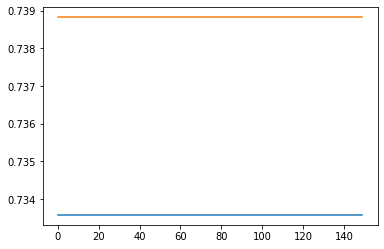

In [ ]:
acc3 = history3.history['acc']
epoch3 = history3.history['val_acc']

plt.plot(acc3)
plt.plot(epoch3)
plt.show()